In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [47]:
data = load_iris()
X=data.data
Y=data.target
classes = data.target_names


In [48]:
df = pd.DataFrame(X,columns=data.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


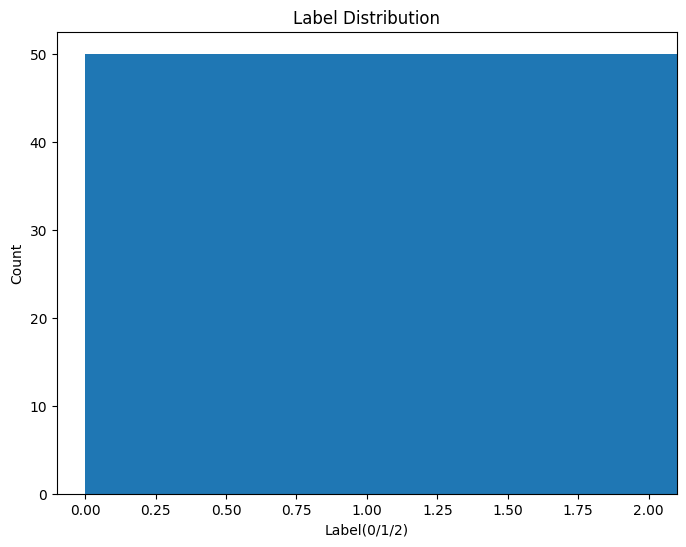

In [49]:
plt.figure(figsize=(8,6))
plt.hist(Y,width=1)
plt.title('Label Distribution')
plt.xlabel('Label(0/1/2)')
plt.ylabel('Count')
plt.show()


In [50]:
for i, name in enumerate(classes):
    print(f'Target {i} is {name}')

Target 0 is setosa
Target 1 is versicolor
Target 2 is virginica


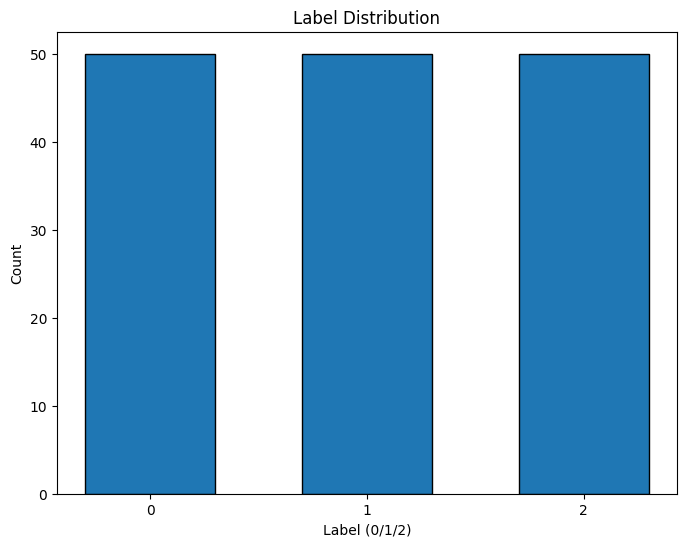

In [51]:
unique_labels, counts = np.unique(Y, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, width=0.6, edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label (0/1/2)')
plt.ylabel('Count')
plt.xticks(unique_labels)  # Ensure labels are centered under bars
plt.show()


In [52]:
x_test,x_train,y_test,y_train = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred_linear = linear_model.predict(x_test)
mse_linear=mean_squared_error(y_test,y_pred_linear)

In [54]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_logistic = logistic_model.predict(x_test)
accuracy_logistic=accuracy_score(y_test,y_pred_logistic)
print("LogisticRegression ACCURANCY: ",accuracy_logistic)

LogisticRegression ACCURANCY:  0.9416666666666667


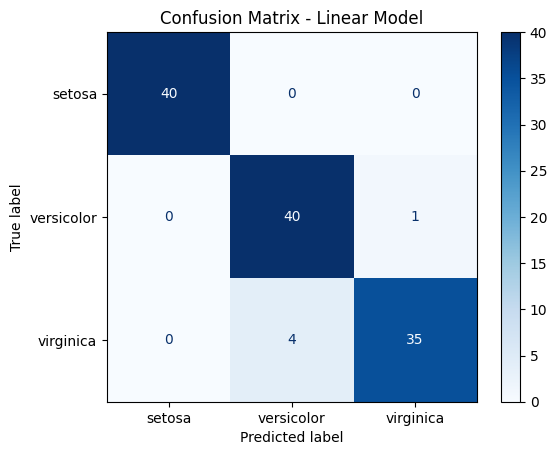

In [56]:
confusion_linear = confusion_matrix(y_test, np.round(y_pred_linear))
conf_display_linear = ConfusionMatrixDisplay(confusion_linear, display_labels=classes)
conf_display_linear.plot(cmap=plt.cm.Blues) 
plt.title('Confusion Matrix - Linear Model')
plt.show()